In [20]:
import pandas as pd

df = pd.read_parquet("pns_filtrada.parquet")
df

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q08901,Q09301,Q111,Q11701,Q12201,Q125,L021,L024,L027,L030
0,1,1,1,2,3,6,3,1,7,2,...,NA,50,NA,NA,NA,NA,NA,NA,NA,NA
1,1,2,1,2,4,2,0,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,2,1,2,7,0,3,1,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,2,1,1,7,3,3,1,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,2,2,1,3,2,1,2,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60939,1,1,1,1,5,2,0,1,2,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60940,1,1,1,2,5,2,1,2,3,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60941,1,1,1,2,3,3,1,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60942,2,2,1,1,7,2,0,2,6,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
import numpy as np

# Substituir 'NA' por NaN
df['Q003'] = df['Q003'].replace('NA', np.nan)

# Converter para numérico
df['Q003'] = pd.to_numeric(df['Q003'], errors='coerce')

# Criar faixas etárias (não precisa converter para inteiro)
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['faixa_et_diag_hip'] = pd.cut(df['Q003'], bins=bins, labels=labels, right=False)
df_idades_hip = df[df['Q00201'] == '1']

df_idades_hip

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q09301,Q111,Q11701,Q12201,Q125,L021,L024,L027,L030,faixa_et_diag_hip
0,1,1,1,2,3,6,3,1,7,2,...,50,NA,NA,NA,NA,NA,NA,NA,NA,40-50
5,1,1,1,1,7,7,0,1,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,60-70
9,1,1,1,2,3,0,2,1,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,60-70
21,1,2,1,2,2,4,2,1,7,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,50-60
25,1,2,1,2,5,0,2,1,2,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,1,2,1,2,2,5,0,1,7,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,10-20
60924,1,2,1,2,2,2,0,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,10-20
60930,1,2,2,1,0,2,2,2,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,50-60
60935,1,2,1,1,2,3,1,1,7,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,40-50


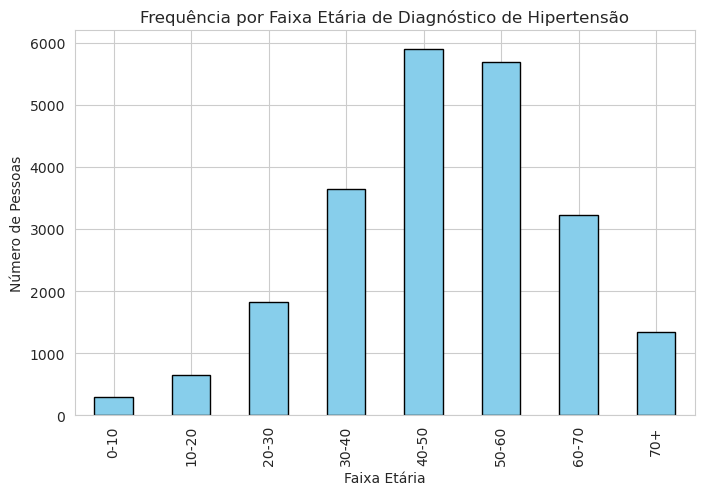

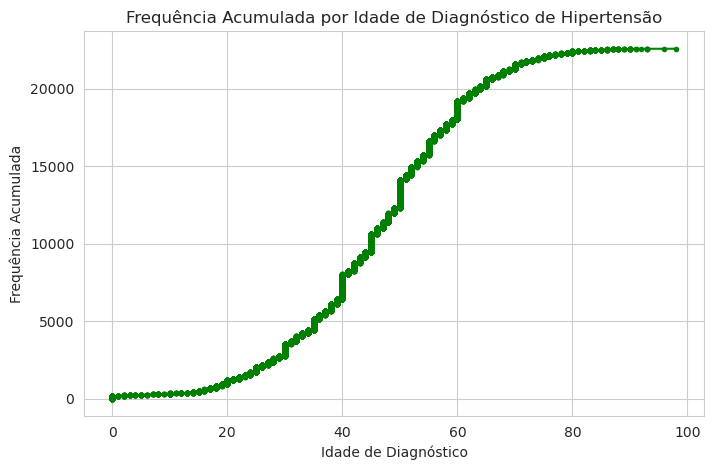

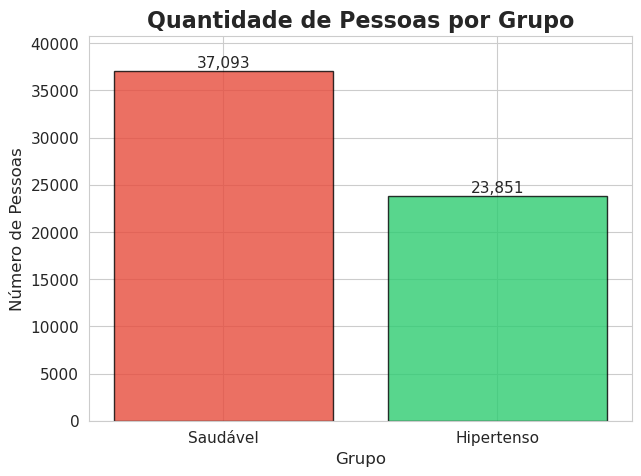

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Gráfico de frequência por faixa etária ---
frequencia = df_idades_hip['faixa_et_diag_hip'].value_counts().sort_index()

plt.figure(figsize=(8,5))
frequencia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequência por Faixa Etária de Diagnóstico de Hipertensão')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/frequencia_faixa_etaria.png", 
            dpi=300, bbox_inches="tight")
plt.show()


# --- Gráfico de frequência acumulada ---
idades = df_idades_hip['Q003'].dropna().sort_values()
freq_acum = np.arange(1, len(idades)+1)

plt.figure(figsize=(8,5))
plt.plot(idades, freq_acum, marker='.', linestyle='-', color='green')
plt.title('Frequência Acumulada por Idade de Diagnóstico de Hipertensão')
plt.xlabel('Idade de Diagnóstico')
plt.ylabel('Frequência Acumulada')
plt.grid(True)

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/frequencia_acumulada.png", 
            dpi=300, bbox_inches="tight")
plt.show()


# --- Gráfico de comparação Hipertensos vs Saudáveis ---
sns.set_style("whitegrid")
df['hipertensao'] = df['Q00201'].apply(lambda x: 'Hipertenso' if x == '1' else 'Saudável')
contagem = df['hipertensao'].value_counts()

plt.figure(figsize=(7,5))
colors = ['#e74c3c', '#2ecc71']
bars = plt.bar(contagem.index, contagem.values, color=colors, edgecolor='black', alpha=0.8)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 50, f'{altura:,}', 
             ha='center', va='bottom', fontsize=11)

plt.title('Quantidade de Pessoas por Grupo', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(contagem.values)*1.1)

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/hipertensos_vs_saudaveis.png", 
            dpi=300, bbox_inches="tight")
plt.show()
